In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
def time_convert(x):
    h, m, s = map(int, x.split(':'))
    return (h * 60 + m) * 60 + s

In [3]:
df = pd.read_csv(
    '../data/berlin_firmenlauf.csv', 
    sep=';', 
    names=['place', 'place_men', 'place_women', 'jersey_number', 'first_name', 'last_name', 'place_age_group', 'age_group', 'team', 'time', 'company'], 
    skiprows=1, 
)
df['time_in_sec'] = df.time.apply(time_convert)
df.sample(5)

,place,place_men,place_women,jersey_number,first_name,last_name,place_age_group,age_group,team,time,company,time_in_sec
38,4911,NaN,750.0,13349,Antonella,Aquaro,262,W20,DECATHLON Berlin,00:27:47,DECATHLON Berlin,1667
10,3641,3234.0,NaN,6701,Ulf,Germann,592,M35,Onefootball,00:26:30,Onefootball GmbH,1590
5,1542,1441.0,NaN,6709,Anderson,Queiroz,401,M20,Onefootball,00:24:02,Onefootball GmbH,1442
14,5590,4626.0,NaN,6710,Tiago,Queiroz,1123,M20,Onefootball,00:28:24,Onefootball GmbH,1704
33,2741,2489.0,NaN,13409,Unbekannt,Nr 36,58,NaN,DECATHLON Berlin,00:25:34,DECATHLON Berlin,1534


In [4]:
me = df.loc[(df.first_name=='Louis') & (df.last_name=='Guitton')]
me

,place,place_men,place_women,jersey_number,first_name,last_name,place_age_group,age_group,team,time,company,time_in_sec
15,5736,4713.0,NaN,6703,Louis,Guitton,1148,M20,Onefootball,00:28:32,Onefootball GmbH,1712


In [5]:
k = df.loc[df.time_in_sec == df.loc[df.team=='Onefootball'].time_in_sec.min(), :]
k

,place,place_men,place_women,jersey_number,first_name,last_name,place_age_group,age_group,team,time,company,time_in_sec
0,545,528.0,NaN,6699,Konstantin,Escher,154,M30,Onefootball,00:22:14,Onefootball GmbH,1334


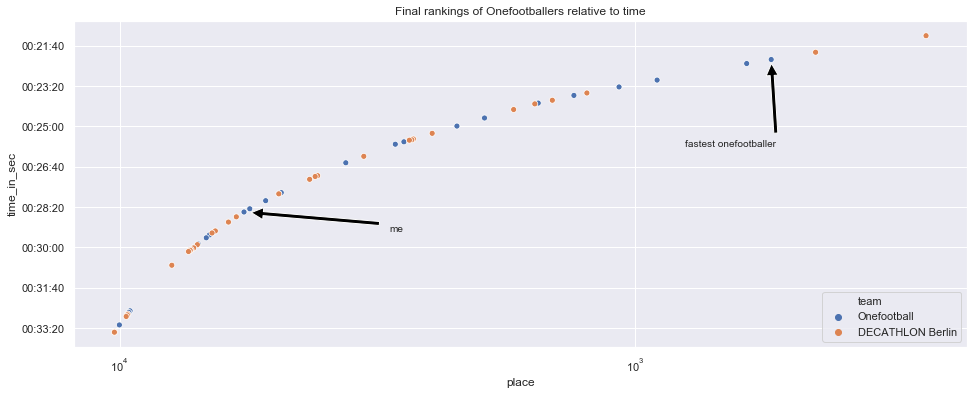

In [6]:
plt.figure(figsize=(16, 6))
ax = sns.scatterplot('place', 'time_in_sec', hue='team', data=df)
ax.set(xscale="log")
ax.invert_xaxis()
ax.invert_yaxis()
ax.set_title('Final rankings of Onefootballers relative to time')
yticks = ax.get_yticks()
ax.set_yticklabels([pd.to_datetime(tm, unit='s').strftime('%H:%M:%S') for tm in yticks])
ax.annotate('me', xy=(me['place'], me['time_in_sec']), xytext=(3000, 1760),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
ax.annotate('fastest onefootballer', xy=(k['place'], k['time_in_sec']), xytext=(800, 1550),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.legend(loc='lower right')